In [90]:
#import necessary modules

import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

In [91]:
# Step 1: Data acquisition

df: pd.DataFrame = pd.read_excel('Data Take Home Assignment 1 Exercise A.xlsx')
df = df.iloc[142:162]
df

,X,Y
142,23.77,445.72
143,14.43,466.58
144,28.25,436.99
145,12.26,470.87
146,14.55,457.77
147,24.57,448.15
148,10.25,476.03
149,21.96,442.87
150,9.82,477.93
151,18.58,459.06


In [92]:
# Step 2: Data transformation using Min-Max normalization
# info: https://www.geeksforgeeks.org/data-normalization-in-data-mining/

def normalize(df):
    for c in df.columns: 
        df[c] = (df[c] - df[c].min()) / (df[c].max() - df[c].min())
    return df

df = normalize(df)
df

,X,Y
142,0.727098,0.224976
143,0.279137,0.726901
144,0.941966,0.014918
145,0.175060,0.830125
146,0.284892,0.514918
147,0.765468,0.283446
148,0.078657,0.954283
149,0.640288,0.156400
150,0.058034,1.000000
151,0.478177,0.545958


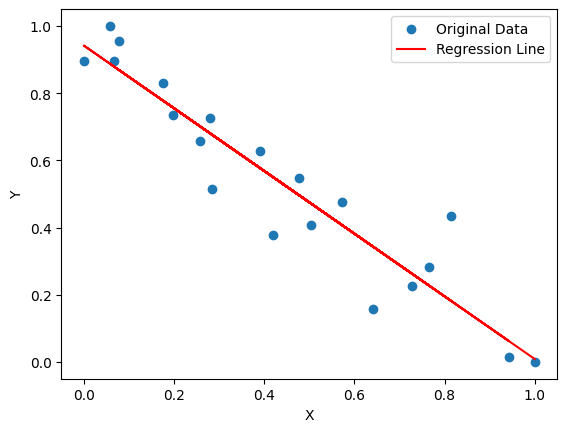

In [93]:
# Step 3: Least Squares
def least_squares(x, y):
    """Given the X and Y parameters of a data set, will return a regression line.
    The regression line is calculated with the formula `Y = m*x + b` where:
        - `Y` is the the predicted parameters,
        - `m` is the slope coefficient,
        - `b` is the y-intercept, 
        - `x` is the input data.
    
    Args:
        - `x`: original x data
        - `y`: original y data
        
    Returns:
        - `y_prediction`: regression line
    """
    n = len(x)
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    xy_sum = np.sum(x*y)
    x_squared_sum = np.sum(x**2)

    m = (n * xy_sum - x_sum*y_sum) / (n*x_squared_sum - x_sum**2) # slope coefficient
    b = (y_sum - m*x_sum) / n # y-intercept

    y_prediction = m*x + b 
    return y_prediction

prediction = least_squares(df.X, df.Y)

# plot original data against regression line
plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, prediction, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Instructions: Implement gradient descent function
* The number of iterations `num_iters` is the number of times that you'll use the entire training set.
* For each iteration, you'll calculate the cost function using all training examples (there are `m` training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1) 
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [95]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # get 'm', the number of rows in matrix x
    m = len(x)
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = x.dot(theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))

        # update the weights theta
        theta -= (alpha / m) * (np.dot(x.T, (h - y)))
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta

In [96]:
# Step 4: Gradient Descent - Cost/Loss function using Mean Squared Error (MSE)

def loss_function(y, y_predict):
    """Implementation of the Mean Squared Error (MSE) loss function.
    
    Args:
        - `y`: one y data point
        - `y_predict`: corresponding predicted data point
        
    Returns:
        - prediction error
    """
    return (y-y_predict)**2

cost = loss_function(np.array(df.Y)[4], np.array(prediction)[4])
cost

0.025875934147974816